In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the CSV file
csv_file_path = 'C:\\Users\\avisa\\OneDrive\\Desktop\\Daily Tasks for LINKEDIN\\task-3\\archive (5)\\Twitter_Data.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Drop rows with missing values
df = df.dropna(subset=['clean_text', 'category'])

# Separate the data into features (X) and labels (y)
X = df['clean_text'].values
y = df['category'].values

# Tokenization, stopword removal, and stemming
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [ps.stem(token) for token in tokens if token.isalpha() and token.lower() not in stop_words]
    return ' '.join(tokens)

X = [preprocess_text(text) for text in X]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\avisa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avisa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.90      0.12      0.21      7152
         0.0       0.84      0.33      0.48     11067
         1.0       0.51      0.97      0.67     14375

    accuracy                           0.57     32594
   macro avg       0.75      0.47      0.45     32594
weighted avg       0.71      0.57      0.50     32594



In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the text data using TF-IDF Vectorizer with N-grams
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [11]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search
param_grid = {'alpha': [0.1, 0.5, 1.0],
              'fit_prior': [True, False]}

# Create a Multinomial Naive Bayes classifier
classifier = MultinomialNB()

# Perform grid search
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vectorized, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_classifier = MultinomialNB(alpha=best_params['alpha'], fit_prior=best_params['fit_prior'])
best_classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = best_classifier.predict(X_test_vectorized)


In [12]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Tokenize and obtain embeddings for a sample sentence
sentence = "i wanted to know you."
tokens = tokenizer(sentence, return_tensors='pt')
with torch.no_grad():
    embeddings = model(**tokens)['last_hidden_state']

# The 'embeddings' variable contains the contextual embeddings for each token in the input sentence.


C:\Users\avisa\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\avisa\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


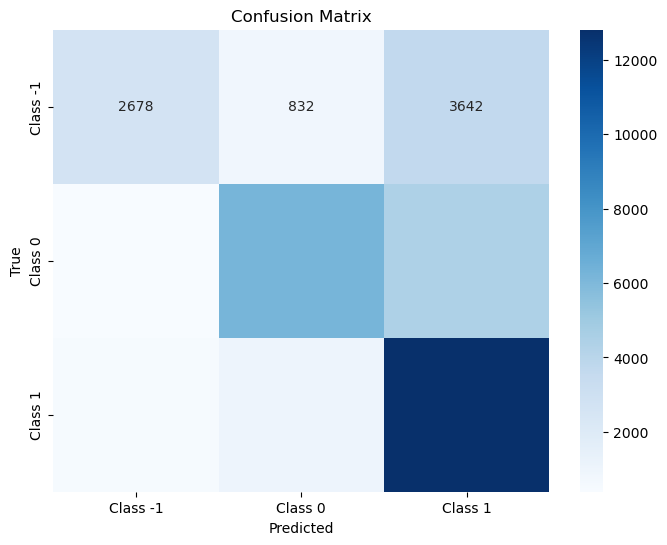

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class -1', 'Class 0', 'Class 1'], yticklabels=['Class -1', 'Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


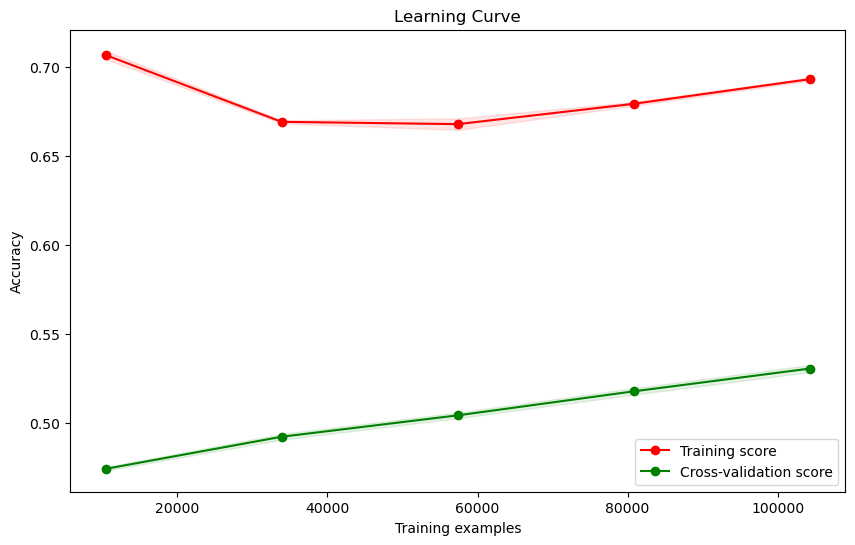

In [15]:
from sklearn.model_selection import learning_curve
import numpy as np

# Create learning curve
train_sizes, train_scores, test_scores = learning_curve(classifier, X_train_vectorized, y_train, cv=5, scoring='accuracy')

# Calculate mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


  Obtaining dependency information for WordCloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   -------------------------------- ------- 122.9/151.4 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 151.4/151.4 kB 3.0 MB/s eta 0:00:00


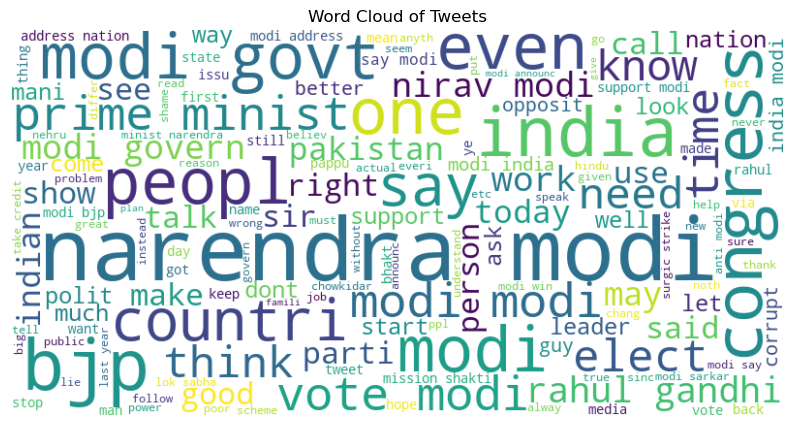

In [17]:
!pip install WordCloud

from wordcloud import WordCloud

# Combine all tweets into a single text
all_text = ' '.join(X)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()


C:\Users\avisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\avisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\avisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\avisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_con

<Figure size 1000x800 with 0 Axes>

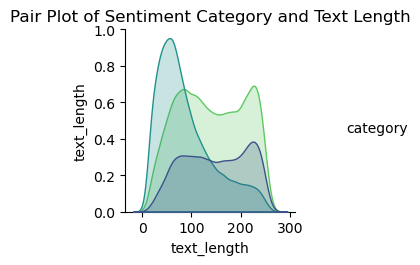

In [19]:
import seaborn as sns

# Add text length as a feature
df['text_length'] = df['clean_text'].apply(len)

# Convert 'category' to a categorical data type
df['category'] = df['category'].astype('category')

# Select relevant features for the pair plot
pair_plot_data = df[['category', 'text_length']]

# Create pair plot
plt.figure(figsize=(10, 8))
sns.pairplot(pair_plot_data, hue='category', markers=["o", "s", "D"], palette='viridis')
plt.title('Pair Plot of Sentiment Category and Text Length')
plt.show()


C:\Users\avisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\avisa\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Figure size 800x800 with 0 Axes>

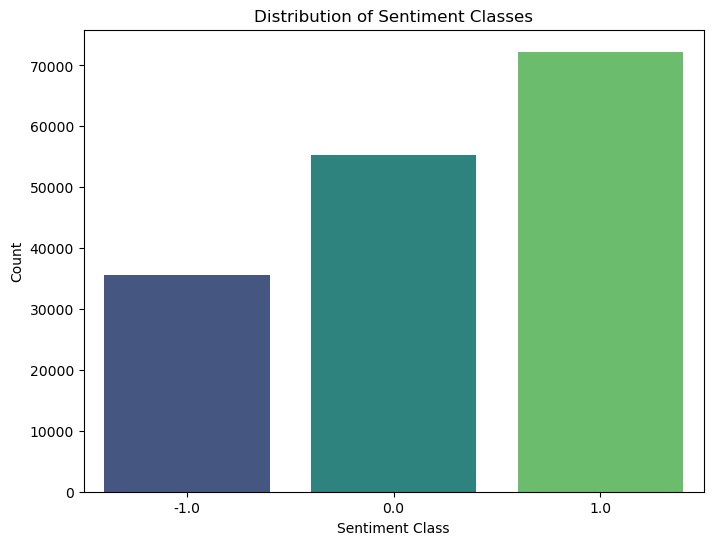

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with sentiment analysis results
# Add text length as a feature
df['text_length'] = df['clean_text'].apply(len)

# Convert 'category' to a categorical data type
df['category'] = df['category'].astype('category')

# Count the occurrences of each class
class_counts = df['category'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=df, palette='viridis')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Classes')
plt.show()


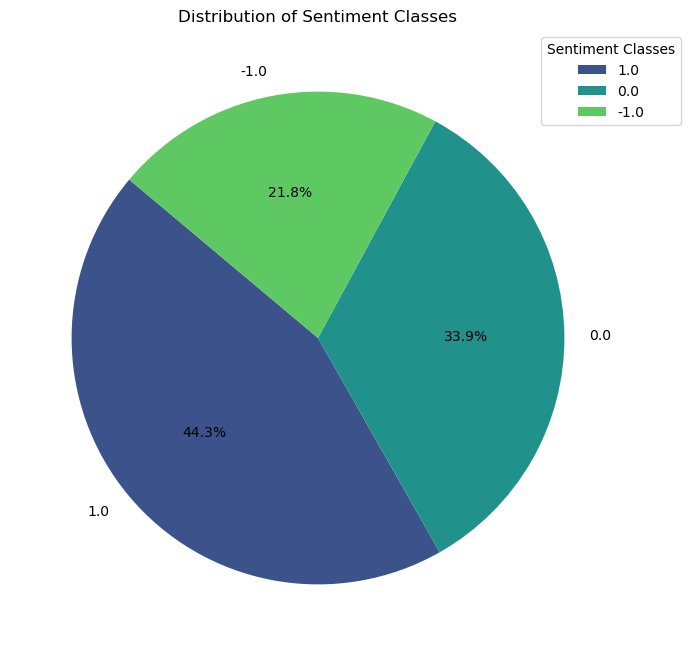

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with sentiment analysis results
# Add text length as a feature
df['text_length'] = df['clean_text'].apply(len)

# Convert 'category' to a categorical data type
df['category'] = df['category'].astype('category')

# Count the occurrences of each class
class_counts = df['category'].value_counts()

# Plot a pie chart with legend
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(class_counts)))
plt.title('Distribution of Sentiment Classes')
plt.legend(title='Sentiment Classes', loc='upper right', bbox_to_anchor=(1.1, 1))
plt.show()
